# **1 Supervised Learning**

# **1.1 Import the monthly and annual data and join**

In [1]:
#Read the Retail_data_Response file from Kaggle
import pandas as pd
import io
from google.colab import files
uploaded=files.upload()



Saving Retail_Data_Response.csv to Retail_Data_Response.csv


In [2]:
Retail_Data_Response=pd.read_csv(io.BytesIO(uploaded.get('Retail_Data_Response.csv')))
Retail_Data_Response.head()

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1


In [3]:
uploaded=files.upload()



Saving annual_day_of_week_counts_pivot.xlsx to annual_day_of_week_counts_pivot.xlsx
Saving annual_features.xlsx to annual_features.xlsx
Saving days_since_last_txn.xlsx to days_since_last_txn.xlsx
Saving mth_day_counts.xlsx to mth_day_counts.xlsx
Saving mth_rolling_features.xlsx to mth_rolling_features.xlsx


In [4]:
#Annual features
annual_features=pd.read_excel(io.BytesIO(uploaded.get('annual_features.xlsx')))
annual_day_of_week_counts_pivot=pd.read_excel(io.BytesIO(uploaded.get('annual_day_of_week_counts_pivot.xlsx')))

#Merge the annual feature files with the response file
annual_features_output = pd.merge(annual_features, annual_day_of_week_counts_pivot, on = 'customer_id').merge(Retail_Data_Response, on = 'customer_id')
annual_features_output

,customer_id,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_cnt_2011,ann_txn_amt_cnt_2012,ann_txn_amt_cnt_2013,ann_txn_amt_cnt_2014,...,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday,response
0,CS1112,70.666667,67.400000,70.666667,70.666667,39.000000,3,5,3,3,...,1,1,0,0,0,0,0,0,1,0
1,CS1113,81.333333,74.800000,85.200000,56.500000,73.333333,3,5,5,4,...,3,0,0,2,0,0,0,0,1,0
2,CS1114,85.200000,75.000000,70.400000,70.833333,79.000000,5,2,5,6,...,1,1,0,0,0,0,1,0,0,1
3,CS1115,87.000000,67.571429,79.571429,78.250000,55.000000,3,7,7,4,...,0,2,0,0,0,0,1,0,0,1
4,CS1116,58.750000,76.666667,59.000000,66.600000,0.000000,4,3,1,5,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6879,CS8996,31.000000,33.666667,41.500000,56.000000,0.000000,2,3,2,6,...,1,2,0,0,0,0,0,0,0,0
6880,CS8997,45.000000,39.500000,35.166667,42.000000,0.000000,2,4,6,2,...,0,0,0,0,0,0,0,0,0,0
6881,CS8998,64.000000,54.400000,47.000000,32.500000,0.000000,2,5,2,4,...,1,1,0,0,0,0,0,0,0,0
6882,CS8999,52.000000,25.250000,28.000000,21.000000,0.000000,3,4,3,2,...,0,2,0,0,0,0,0,0,0,0


In [5]:
#Monthly features
mth_day_counts=pd.read_excel(io.BytesIO(uploaded.get('mth_day_counts.xlsx')))
mth_day_counts = mth_day_counts.drop('Unnamed: 0', axis = 1)

mth_rolling_features=pd.read_excel(io.BytesIO(uploaded.get('mth_rolling_features.xlsx')))
mth_rolling_features = mth_rolling_features.drop('Unnamed: 0', axis = 1)
mth_rolling_features = mth_rolling_features.fillna(0)

days_since_last_txn=pd.read_excel(io.BytesIO(uploaded.get('days_since_last_txn.xlsx')))
days_since_last_txn = days_since_last_txn.drop('Unnamed: 0', axis = 1)

month_features_output = pd.merge(mth_rolling_features, mth_day_counts, on = ['CLNT_NO', 'ME_DT']).merge(days_since_last_txn, on = ['CLNT_NO', 'ME_DT']).merge(Retail_Data_Response.rename(columns={'customer_id': 'CLNT_NO'}), on = 'CLNT_NO')
month_features_output

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,...,txn_cnt_max_12M,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday,days_since_last_txn,response
0,CS1112,2011-05-31,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0,0,0,0,0,0,0,74.78425,0
1,CS1112,2011-06-30,56,1,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0,0,0,0,0,0,1,15.00000,0
2,CS1112,2011-07-31,0,0,56.0,18.666667,56.0,1.0,0.333333,1.0,...,0.0,0,0,0,0,0,0,0,46.00000,0
3,CS1112,2011-08-31,96,1,152.0,50.666667,96.0,2.0,0.666667,1.0,...,0.0,1,0,0,0,0,0,0,12.00000,0
4,CS1112,2011-09-30,0,0,96.0,32.000000,96.0,1.0,0.333333,1.0,...,0.0,0,0,0,0,0,0,0,42.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323543,CS9000,2014-11-30,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,1.0,0,0,0,0,0,0,0,98.00000,0
323544,CS9000,2014-12-31,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,1.0,0,0,0,0,0,0,0,129.00000,0
323545,CS9000,2015-01-31,0,0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,1.0,0,0,0,0,0,0,0,160.00000,0
323546,CS9000,2015-02-28,34,1,34.0,11.333333,34.0,1.0,0.333333,1.0,...,1.0,0,0,1,0,0,0,0,0.00000,0


# **1.2 Steps for each method**

1. Separate the inputs X and the output y in two data frames.
2. Split the data in train and test set. Use a test size value of 2/3 and set the random state equal to 1147 for consistency (i.e. the course code value). Use the following names for consistency.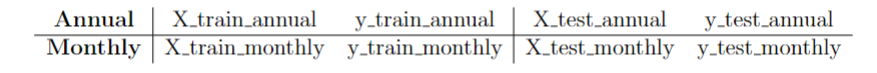

3. Pre-process (if necessary for the method).
4. Fit the training dataset and optimize the hyperparameters of the method.
5. Plot coefficient values or feature importance.
6. Plot probability distribution for test set.
7. Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall.
8. Plot decision boundary for top 2 features.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, precision_score, recall_score, roc_curve, auc, f1_score



**1)Annual Features Output**



In [7]:
#1.Separate the inputs X and the output y in two data frames.
X_annual=annual_features_output.drop(['customer_id', 'response'], axis = 1)
y_annual = annual_features_output['response']


In [8]:
#2.Split the data in train and test set.
X_train_annual, X_test_annual, y_train_annual, y_test_annual = train_test_split(X_annual, y_annual, test_size=2/3, random_state=1147)

In [9]:
#3.Preprocessing with standardscaler
scaler_annual = StandardScaler()
X_train_annual_scaled = scaler_annual.fit_transform(X_train_annual)
X_test_annual_scaled = scaler_annual.transform(X_test_annual)

**Logistic Regression with L1 regularization**

In [10]:
#4.Fit the training dataset and optimize the hyperparameters of the method.
#solver="liblinear" worls well for small datasets according to logistic regression documentation

#Define a function to optimize the hyperparameter C (the inverse of regularization strength) 
#of the logistic regression model by comparing metrics including the training and test set accuracy, AUC and F1 score
#of different C values.

def optimize_C(X_train, y_train, X_test, y_test):
  Cs = [0.005, 0.01, 0.05, 0.1, 1, 10,20]
  LogReg_C,accuracy_train,accuracy_test,f1_train, f1_test, auc_train, auc_test = [],[],[],[],[],[],[]
  for i in range(len(Cs)):
    #Fit models with different C values
    c = Cs[i]
    LogReg_C.append(LogisticRegression(penalty='l1', C = c, solver='liblinear',class_weight='balanced',random_state=1147))
    LogReg_C[i].fit(X_train, y_train)

    #Accuracy of training and test set
    y_train_predicted = LogReg_C[i].predict(X_train)
    y_test_predicted = LogReg_C[i].predict(X_test)

    accuracy_train.append(100*accuracy_score(y_train, y_train_predicted, normalize = True))
    accuracy_test.append(100*accuracy_score(y_test, y_test_predicted, normalize = True))

    #F1 score of training and test set
    f1_train.append(100*f1_score(y_train, y_train_predicted))
    f1_test.append(100*f1_score(y_test, y_test_predicted))

    #AUCs of training and test set
    scores_train = LogReg_C[i].predict_proba(X_train)[:,1] 
    scores_test  = LogReg_C[i].predict_proba(X_test)[:,1]

    fpr_train, tpr_train, _ = roc_curve(y_train, scores_train)
    fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)

    auc_train.append(auc(fpr_train, tpr_train))
    auc_test.append(auc(fpr_test, tpr_test))

    #Summarize the performance of all Cs with the metrics
    performance={'ACCURACY_TRAIN': accuracy_train, 'ACCURACY_TEST': accuracy_test, 'F1_TRAIN': f1_train, 'F1_TEST': f1_test,  'AUC_TRAIN': auc_train, 'AUC_TEST': auc_test}
    performance_df = pd.DataFrame(performance)

  #Add a column with corresponding C values
  performance_df.insert(0, 'C', value = Cs)
  return performance_df


In [11]:
#Get the performance metrics dataframe of all tested C values for the annual features output dataset
LogReg_performance_annual=optimize_C(X_train_annual_scaled, y_train_annual, X_test_annual_scaled, y_test_annual)

In [30]:
#Define a function to plot metrics including the training and test set accuracy, AUC and F1 score
#in terms of different C values to visualize the performace of differnt C values.
def plot_performance(performance_df,xaxis):

  #Plot accuracy of train and test set versus differnt C
  fig = plt.figure(figsize=(24,7))
  fig_a = plt.subplot(1,3,1)
  ax1 = performance_df.plot(x = xaxis, y = 'ACCURACY_TRAIN', ax = fig_a, style = 'o-', markersize =7)
  ax2 = performance_df.plot(x = xaxis, y = 'ACCURACY_TEST', ax = fig_a, style = 'o-', markersize =7)
  ax1.set_xlabel("Hyperparameter: %s" % xaxis)
  ax1.set_ylabel("Normalized Accuracy (%)")

  #Plot AUC values of train and test set versus differnt C
  fig_b = plt.subplot(1,3,2)
  ax2 = performance_df.plot(x = xaxis, y = 'AUC_TRAIN', ax = fig_b, style = 'o-', markersize =7)
  ax2 = performance_df.plot(x = xaxis, y = 'AUC_TEST', ax = fig_b, style = 'o-', markersize =7)
  ax2.set_xlabel("Hyperparameter: %s" % xaxis)
  ax2.set_ylabel("Area Under the Curve (AUC)")
     
  #Plot F1 scores of train and test set versus differnt C   
  fig_c = plt.subplot(1,3,3)
  ax3 = performance_df.plot(x = xaxis, y = 'F1_TRAIN', ax = fig_c, style = 'o-', markersize =7)
  ax3 = performance_df.plot(x = xaxis, y = 'F1_TEST', ax = fig_c, style = 'o-', markersize =7)
  ax3.set_xlabel("Hyperparameter: %s" % xaxis)
  ax3.set_ylabel("F1 Score")
     
  plt.show()

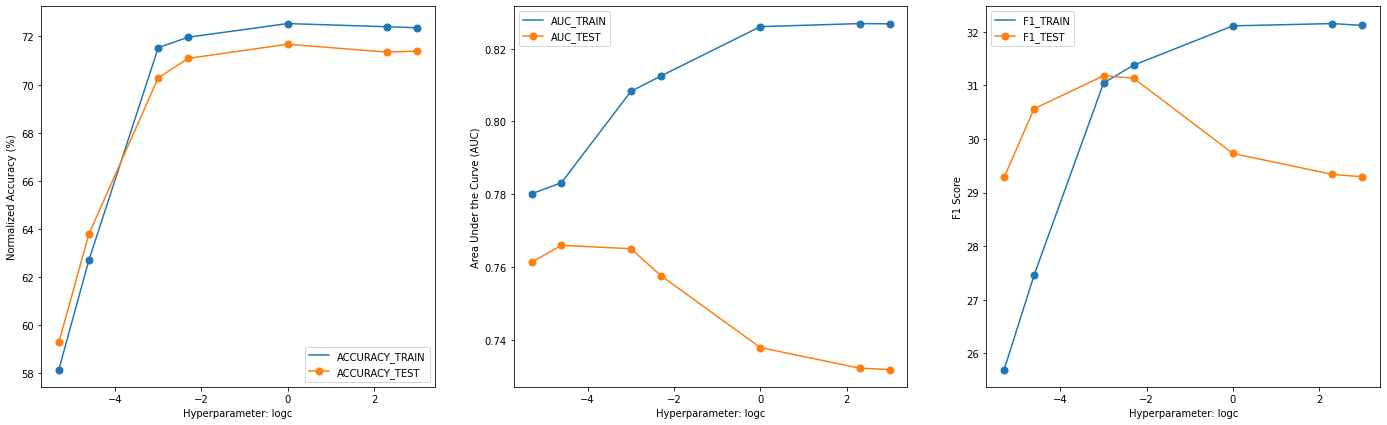

In [32]:
#Add a column logC to the performace dataframe
LogReg_performance_annual['logc'] = np.log(LogReg_performance_annual['C'])
plot_performance(LogReg_performance_annual,'logc')

As can be seen from the accuracy versus logC curves, the performance of C has higher accuracy for both training and test set when C is bigger than 0.05. From the AUC and F1 scores versus logC plots, it shows that the logistic regression model has the best performance for test set when C=0.05. AS we should put more emphasis on the performance on the test set when trying to optimize the hyperparameter, I choose C=0.05 as the best C value for the logistic regression model.

In [14]:
#5.Plot coefficient values or feature importance.
LogReg=LogisticRegression(penalty='l1',solver='liblinear', C=0.05, class_weight='balanced',random_state=1147)
LogReg.fit(X_train_annual_scaled, y_train_annual)
coefficients=LogReg.coef_

#prediction and predicted probability 
y_test_pred = LogReg.predict(X_test_annual_scaled) 
y_test_prob = LogReg.predict_proba(X_test_annual_scaled) 
   
#scores for ROC curves 
scores_train = LogReg.predict_proba(X_train_annual_scaled)[:, 1]
scores_test = LogReg.predict_proba(X_test_annual_scaled)[:, 1] 
#Define a function to plot the coefficient values or feature importance.
def plot_coef(coef_list,X_train):
  indices = np.argsort(abs(coef_list[0]))[::-1]
  names = [X_train.columns[i] for i in indices]
  print(f'The indices for top 2 features are: {indices[0]}:{names[0]}, {indices[1]}:{names[1]} ')
 
  #plot coefficient values 
  plt.figure(figsize=(16,7)) 
  plt.bar(range(X_train.shape[1]), coef_list[0])
  plt.title("Coefficient values")
  plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90,size=7)
  plt.show()

The indices for top 2 features are: 32:ann_txn_amt_sum_2013, 8:ann_txn_amt_cnt_2014 


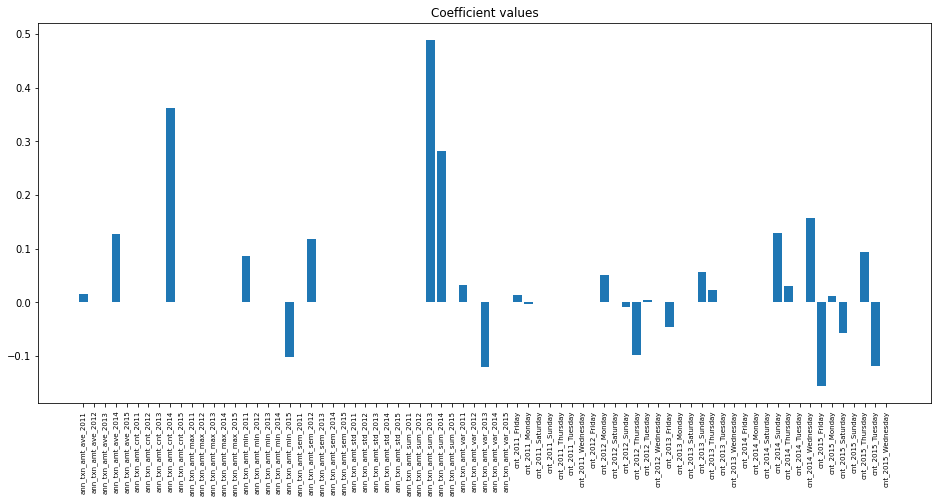

In [15]:
plot_coef(coefficients,X_train_annual)

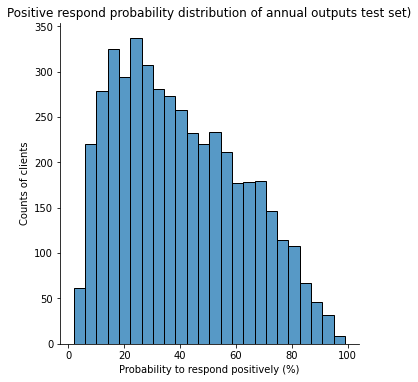

In [16]:
#6.Plot probability distribution for test set.
sns.displot(data = y_test_prob[:,1], x = 100 * y_test_prob[:,1])
plt.title('Positive respond probability distribution of annual outputs test set)')
plt.xlabel('Probability to respond positively (%)')
plt.ylabel('Counts of clients')
plt.show()

In [17]:
#7.Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall.
#Define a function to plot the confusion matrix of train/test set
def plot_confusion_matrix(y_test, y_test_predicted):
  
  cm=confusion_matrix(y_test, y_test_predicted)

  precision = cm[1,1]/cm.sum(axis=0)[1]
  recall = cm[1,1]/cm.sum(axis=1)[1]
 
  print('Precision:', precision)
  print('Recall', recall)
 
  classNames = ['Negative','Positive']
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  thresh = cm.max() / 2.
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 10,
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

Precision: 0.20182887001959504
Recall 0.6851441241685144


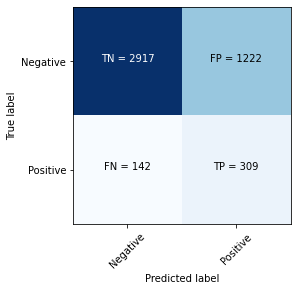

In [18]:
plot_confusion_matrix(y_test_annual.values, y_test_pred)

In [20]:
#Define a function to plot ROC curves of train/test set
def plot_ROC(y_train, scores_train, y_test, scores_test, model):

  fpr_train, tpr_train, _ = roc_curve(y_train, scores_train)
  fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)
  auc_train = auc(fpr_train, tpr_train)
  auc_test  = auc(fpr_test, tpr_test)
 
  # Plotting
  plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train))
  plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test))
  plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5')
  plt.ylim([0,1.0])
  plt.xlim([0,1.0])
  plt.title('{} ROC curves'.format(model))
  plt.ylabel('True positive rate')
  plt.xlabel('False positive rate')
  plt.legend()

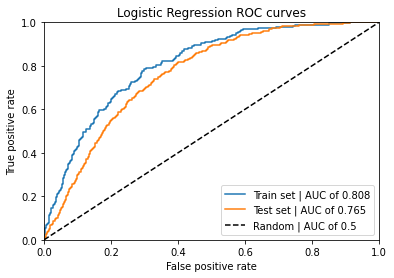

In [21]:
plot_ROC(y_train_annual, scores_train, y_test_annual, scores_test, 'Logistic Regression')

In [28]:
#8.Plot decision boundary for top 2 features.
#Define a function to plot the decision boundary
def plot_decision_boundary(model,feature1, feature2, X_train_scaled, X, y_train):

  min_value1, min_value2 = np.floor(X_train_scaled.min(axis=0)[[feature1, feature2]])
  max_value1, max_value2 = np.ceil(X_train_scaled.max(axis=0)[[feature1, feature2]])

  step1, step2 = (max_value1-min_value1)/10, (max_value2-min_value2)/10
  xx, yy = np.mgrid[min_value1:max_value1:step1, min_value2:max_value2:step2]
  grid = np.c_[xx.ravel(), yy.ravel()]
  median_inputs = np.ones((100, X.shape[1])) * np.median(X_train_scaled, axis=0)
  median_inputs[:,feature1] = grid[:,0]
  median_inputs[:,feature2] = grid[:,1]
 
  probs = model.predict_proba(median_inputs)[:, 1].reshape(xx.shape)
 
  f, ax = plt.subplots(figsize=(8, 6))
  contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
  ax_c = f.colorbar(contour)
  ax_c.set_label("$P(y = 1)$")
  ax_c.set_ticks([0, .25, .5, .75, 1])
    
  ax.scatter(X_train_scaled[50:,feature1], X_train_scaled[50:,feature2], c=y_train[50:], s=50,
               cmap="RdBu", vmin=-.2, vmax=1.2,
               edgecolor="white", linewidth=1)
 
  ax.set(aspect="auto", xlim=(min_value1, max_value1), ylim=(min_value2, max_value2),
           xlabel=f"{X.columns[feature1]} scaled", ylabel=f"{X.columns[feature2]} scaled")

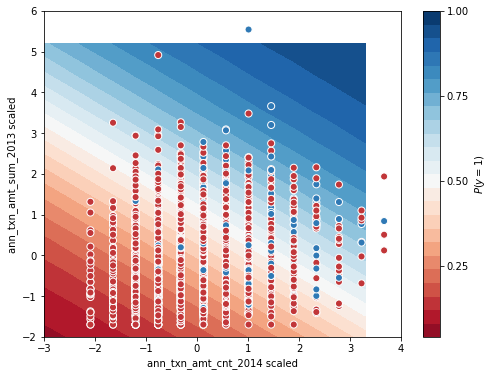

In [29]:
#Top two features are 32:ann_txn_amt_sum_2013, 8:ann_txn_amt_cnt_2014
plot_decision_boundary(LogReg,8, 32, X_train_annual_scaled, X_train_annual, y_train_annual)

**Decision Tree**

In [33]:
#4.Fit the training dataset and optimize the hyperparameters of the method.
#Define a function to return the performance metrics dataframe of decision tree model with
#different hyperparameters (max_depth)

def optimize_dt(X_train, y_train, X_test, y_test): 

    max_depths = range(2, 11) 
    dt_max_depth, accuracy_train, accuracy_test, f1_train, f1_test, auc_train, auc_test = [],[],[],[],[],[],[]
 
    for i in max_depths: 
        # Define and fit\n",
        dt_max_depth.append(DecisionTreeClassifier(max_depth = i, random_state=1147, class_weight='balanced')) 
        dt_max_depth[i-2].fit(X_train, y_train) 
 
        # Score train and test set  
        scores_train = dt_max_depth[i-2].predict_proba(X_train)[:,1] 
        scores_test  = dt_max_depth[i-2].predict_proba(X_test)[:,1]  
 
        # Predict the class of train and test set 
        y_train_predicted = dt_max_depth[i-2].predict(X_train) 
        y_test_predicted = dt_max_depth[i-2].predict(X_test) 
 
        # Calculate training and test accuracy at every iteration and append 
        accuracy_train.append(100*accuracy_score(y_train, y_train_predicted, normalize = True)) 
        accuracy_test.append(100*accuracy_score(y_test, y_test_predicted, normalize = True)) 
 
        # Calculate training and test F1 score at every iteration and append 
        f1_train.append(100*f1_score(y_train, y_train_predicted)) 
        f1_test.append(100*f1_score(y_test, y_test_predicted)) 
 
        # ROC Calc Train and test set  
        fpr_train, tpr_train, _ = roc_curve(y_train, scores_train) 
        fpr_test, tpr_test, _ = roc_curve(y_test, scores_test) 
 
        # Calculate the AUCs 
        auc_train.append(auc(fpr_train, tpr_train)) 
        auc_test.append(auc(fpr_test, tpr_test)) 
 
    performance = {'ACCURACY_TRAIN': accuracy_train,  
                              'ACCURACY_TEST': accuracy_test, 
                              'F1_TRAIN': f1_train, 
                              'F1_TEST': f1_test, 
                              'AUC_TRAIN': auc_train, 
                              'AUC_TEST': auc_test} 
    performance_df = pd.DataFrame(performance)
    performance_df.insert(0, 'MAX_DEPTH', value = max_depths ) 
    return performance_df

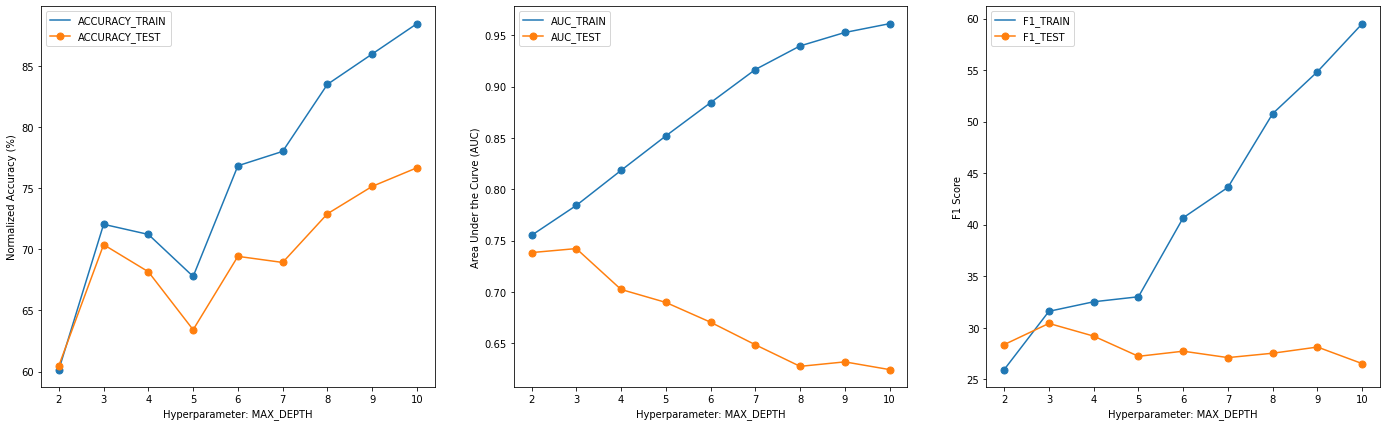

In [34]:
dt_performance_annual=optimize_dt(X_train_annual, y_train_annual, X_test_annual, y_test_annual)
plot_performance(dt_performance_annual,'MAX_DEPTH')

From the performance metrics versus max_depth plots,when the hyperparamter max_depth=3, the AUC value and F1 score of the test set are the highest, so max_depth=3 is chosen for the best decision tree model.

In [35]:
#5.Plot coefficient values or feature importance.
DecTree=DecisionTreeClassifier(max_depth=3, random_state=0, class_weight='balanced')
DecTree.fit(X_train_annual, y_train_annual)
feat_importance=DecTree.feature_importances_

#prediction and predicted probability 
y_test_pred = DecTree.predict(X_test_annual) 
y_test_prob = DecTree.predict_proba(X_test_annual) 
 
#scores for ROC curves 
scores_train = DecTree.predict_proba(X_train_annual)[:, 1] 
scores_test = DecTree.predict_proba(X_test_annual)[:, 1] 

#Plot feature importance function
def plot_importance(importances,X_train):
  indices = np.argsort(abs(importances))[::-1]
  names = [X_train.columns[i] for i in indices]
  print(f'The indices for top 2 features are: {indices[0]}:{names[0]}, {indices[1]}:{names[1]} ')
 
  names = [X_train.columns[i] for i in indices] 
  plt.figure(figsize=(16,5)) 
  plt.title("Feature Importance") 
  plt.bar(range(X_train.shape[1]), importances[indices]) 
  plt.xticks(range(X_train.shape[1]), names, rotation=90) 
  plt.show()

The indices for top 2 features are: 33:ann_txn_amt_sum_2014, 32:ann_txn_amt_sum_2013 


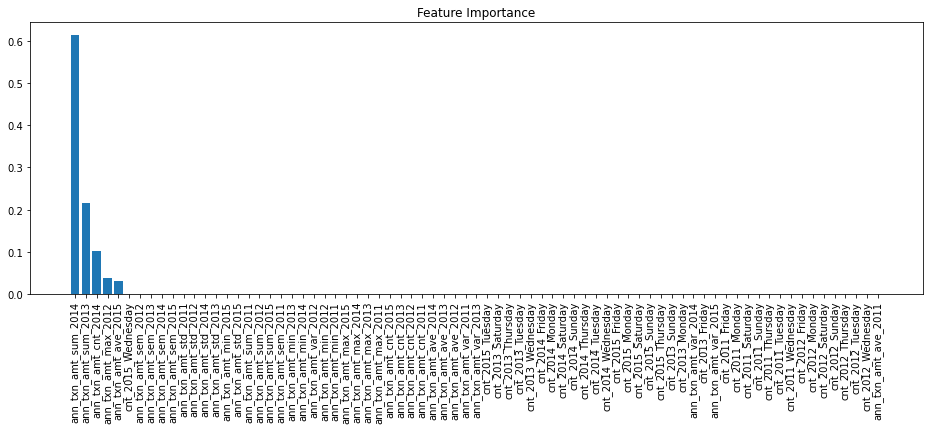

In [36]:
plot_importance(feat_importance,X_train_annual)

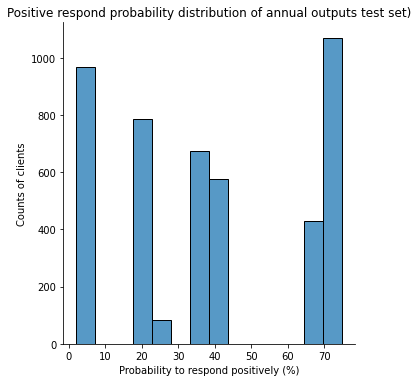

In [37]:
#6.Plot probability distribution for test set.
sns.displot(data = y_test_prob[:,1], x = 100 * y_test_prob[:,1])
plt.title('Positive respond probability distribution of annual outputs test set)')
plt.xlabel('Probability to respond positively (%)')
plt.ylabel('Counts of clients')
plt.show()

Precision: 0.1977363515312916
Recall 0.6585365853658537


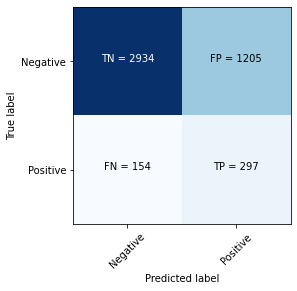

In [38]:
#7.Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall.
plot_confusion_matrix(y_test_annual.values, y_test_pred)

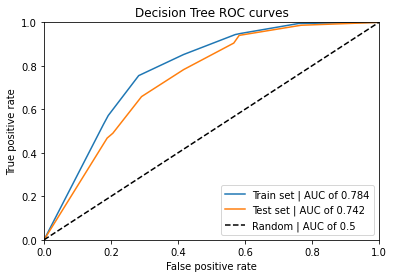

In [39]:
plot_ROC(y_train_annual, scores_train, y_test_annual, scores_test, 'Decision Tree')

In [47]:
def plot_decision_boundary_tree(model,feature1, feature2, X_train, X, y_train):

  min_value1, min_value2 = np.floor(X_train.min(axis=0)[[feature1, feature2]])
  max_value1, max_value2 = np.ceil(X_train.max(axis=0)[[feature1, feature2]])

  step1, step2 = (max_value1-min_value1)/10, (max_value2-min_value2)/10
  xx, yy = np.mgrid[min_value1:max_value1:step1, min_value2:max_value2:step2]
  grid = np.c_[xx.ravel(), yy.ravel()]
  median_inputs = np.ones((100, X.shape[1])) * np.median(X_train, axis=0)
  median_inputs[:,feature1] = grid[:,0]
  median_inputs[:,feature2] = grid[:,1]
 
  probs = model.predict_proba(median_inputs)[:, 1].reshape(xx.shape)
 
  f, ax = plt.subplots(figsize=(8, 6))
  contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
  ax_c = f.colorbar(contour)
  ax_c.set_label("$P(y = 1)$")
  ax_c.set_ticks([0, .25, .5, .75, 1])
    
  ax.scatter(X_train[50:,feature1], X_train[50:,feature2], c=y_train[50:], s=50,
               cmap="RdBu", vmin=-.2, vmax=1.2,
               edgecolor="white", linewidth=1)
 
  ax.set(aspect="auto", xlim=(min_value1, max_value1), ylim=(min_value2, max_value2),
           xlabel=f"{X.columns[feature1]}", ylabel=f"{X.columns[feature2]}")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


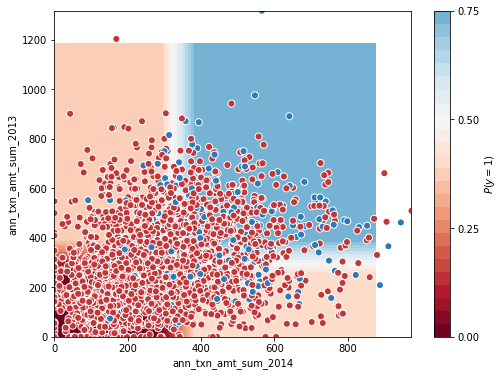

In [48]:
# 8. Plot decision boundary for top 2 features.
plot_decision_boundary_tree(DecTree,33, 32, X_train_annual.values, X_train_annual, y_train_annual)

**Random Forests**

In [41]:
# 4. Fit the training dataset and optimize the hyperparameters of the method
#Define a function to return the performance metrics dataframe of random forests model with
#different hyperparameters (max_depth)

def optimize_rf(X_train, y_train, X_test, y_test): 

    max_depths = range(2, 15) 
    rf_max_depth, accuracy_train, accuracy_test, f1_train, f1_test, auc_train, auc_test = [],[],[],[],[],[],[]
 
    for i in max_depths: 
        # Define and fit\n",
        rf_max_depth.append(DecisionTreeClassifier(max_depth = i, random_state=1147, class_weight='balanced')) 
        rf_max_depth[i-2].fit(X_train, y_train) 
 
        # Score train and test set  
        scores_train = rf_max_depth[i-2].predict_proba(X_train)[:,1] 
        scores_test  = rf_max_depth[i-2].predict_proba(X_test)[:,1]  
 
        # Predict the class of train and test set 
        y_train_predicted = rf_max_depth[i-2].predict(X_train) 
        y_test_predicted = rf_max_depth[i-2].predict(X_test) 
 
        # Calculate training and test accuracy at every iteration and append 
        accuracy_train.append(100*accuracy_score(y_train, y_train_predicted, normalize = True)) 
        accuracy_test.append(100*accuracy_score(y_test, y_test_predicted, normalize = True)) 
 
        # Calculate training and test F1 score at every iteration and append 
        f1_train.append(100*f1_score(y_train, y_train_predicted)) 
        f1_test.append(100*f1_score(y_test, y_test_predicted)) 
 
        # ROC Calc Train and test set  
        fpr_train, tpr_train, _ = roc_curve(y_train, scores_train) 
        fpr_test, tpr_test, _ = roc_curve(y_test, scores_test) 
 
        # Calculate the AUCs 
        auc_train.append(auc(fpr_train, tpr_train)) 
        auc_test.append(auc(fpr_test, tpr_test)) 
 
    performance = {'ACCURACY_TRAIN': accuracy_train,  
                              'ACCURACY_TEST': accuracy_test, 
                              'F1_TRAIN': f1_train, 
                              'F1_TEST': f1_test, 
                              'AUC_TRAIN': auc_train, 
                              'AUC_TEST': auc_test} 
    performance_df = pd.DataFrame(performance)
    performance_df.insert(0, 'MAX_DEPTH', value = max_depths ) 
    return performance_df

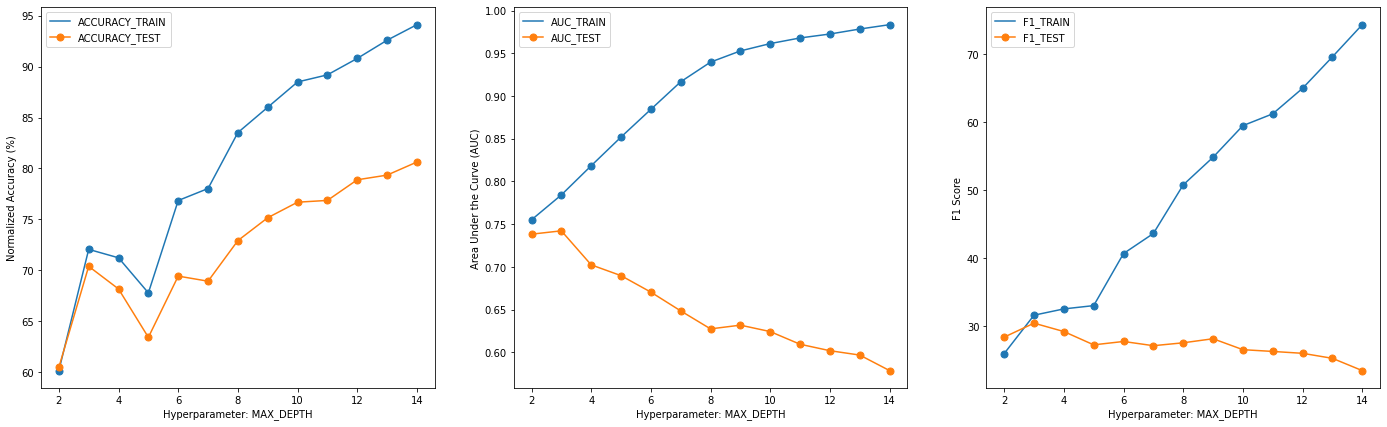

In [42]:
rf_performance_annual=optimize_rf(X_train_annual, y_train_annual, X_test_annual, y_test_annual)
plot_performance(rf_performance_annual,'MAX_DEPTH')

From the performance metrics versus max_depth plots,when the hyperparamter max_depth=3, the accuracy, AUC value and F1 score of the test set are the highest, so max_depth=3 is chosen for the best random forests model.

The indices for top 2 features are: 33:ann_txn_amt_sum_2014, 8:ann_txn_amt_cnt_2014 


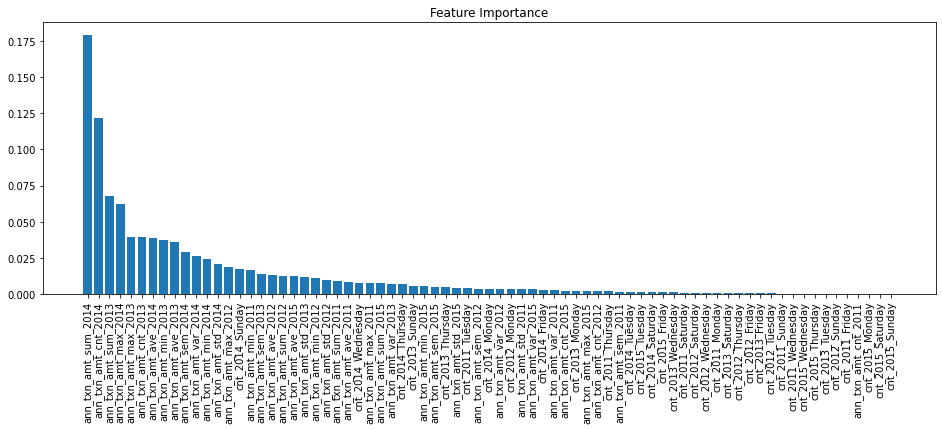

In [73]:
#5. Plot coeffcient values or feature importance.
RanFore=RandomForestClassifier(max_depth = 3, random_state=1147, class_weight='balanced')
RanFore.fit(X_train_annual, y_train_annual)
feat_importance=RanFore.feature_importances_

#prediction and predicted probability 
y_test_pred = RanFore.predict(X_test_annual) 
y_test_prob = RanFore.predict_proba(X_test_annual) 
 
#scores for ROC curves 
scores_train = RanFore.predict_proba(X_train_annual)[:, 1] 
scores_test = RanFore.predict_proba(X_test_annual)[:, 1] 

plot_importance(feat_importance,X_train_annual)

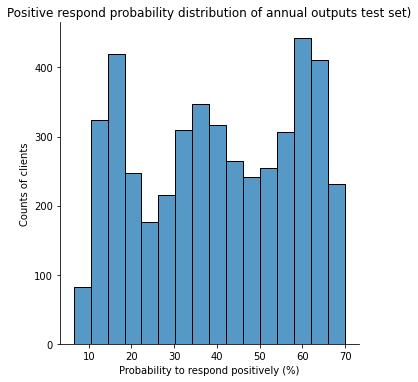

In [44]:
#6.Plot probability distribution for test set.
sns.displot(data = y_test_prob[:,1], x = 100 * y_test_prob[:,1])
plt.title('Positive respond probability distribution of annual outputs test set)')
plt.xlabel('Probability to respond positively (%)')
plt.ylabel('Counts of clients')
plt.show()

Precision: 0.19321623258631132
Recall 0.7073170731707317


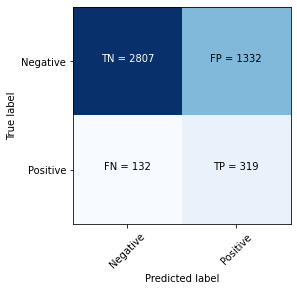

In [45]:
#7.Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall.
plot_confusion_matrix(y_test_annual.values, y_test_pred)

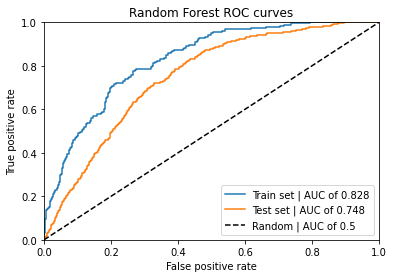

In [74]:
plot_ROC(y_train_annual, scores_train, y_test_annual, scores_test, 'Random Forest')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


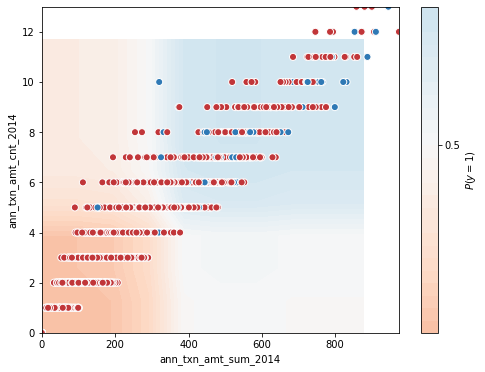

In [49]:
# 8. Plot decision boundary for top 2 features.
plot_decision_boundary_tree(RanFore,33, 8, X_train_annual.values, X_train_annual, y_train_annual)

**`2)Monthly Features Output**

In [51]:
#1.Separate the inputs X and the output y in two data frames.
X_monthly = month_features_output.drop(['CLNT_NO', 'response','ME_DT'], axis = 1)
y_monthly = month_features_output['response']

In [52]:
#2.Split the data in train and test set.
X_train_monthly, X_test_monthly, y_train_monthly, y_test_monthly = train_test_split(X_monthly, y_monthly, test_size=2/3, random_state=1147)

In [53]:
#3.Pre-processing
scaler_monthly = StandardScaler()
X_train_monthly_scaled = scaler_monthly.fit_transform(X_train_monthly)
X_test_monthly_scaled = scaler_monthly.transform(X_test_monthly)

**Logistic Regression with L1 regularization**

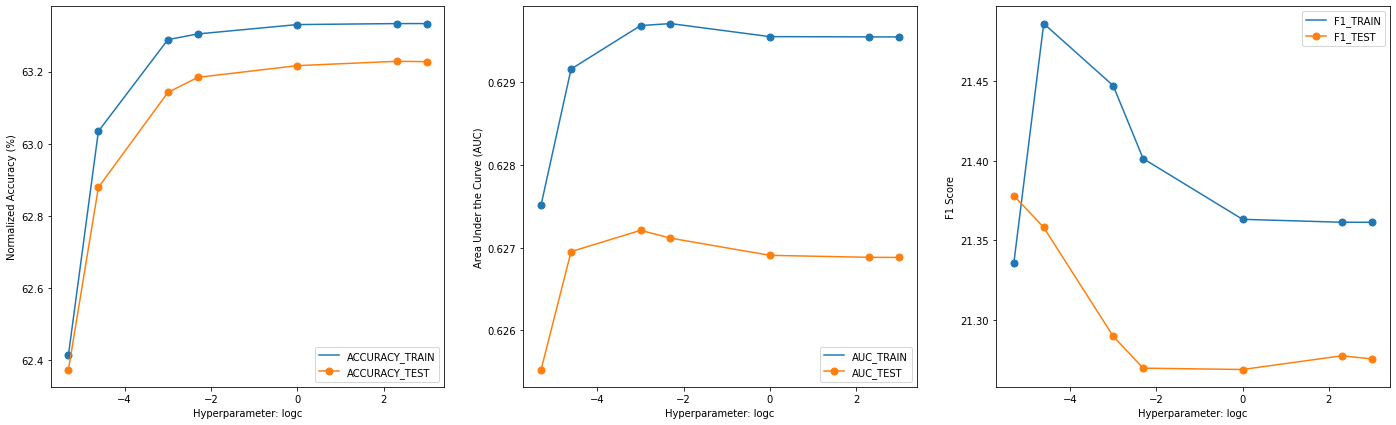

In [54]:
# 4. Fit the training dataset and optimize the hyperparameters of the method
#Get the performance metrics dataframe of all tested C values for the annual features output dataset
LogReg_performance_monthly=optimize_C(X_train_monthly_scaled, y_train_monthly, X_test_monthly_scaled, y_test_monthly)
LogReg_performance_monthly['logc'] = np.log(LogReg_performance_monthly['C'])
plot_performance(LogReg_performance_monthly,'logc')

According to the accuracy and AUC versus logC plots, when C=0.05, the logistic regression model tends to have better performance.

The indices for top 2 features are: 15:amt_mean_12M, 14:amt_sum_12M 


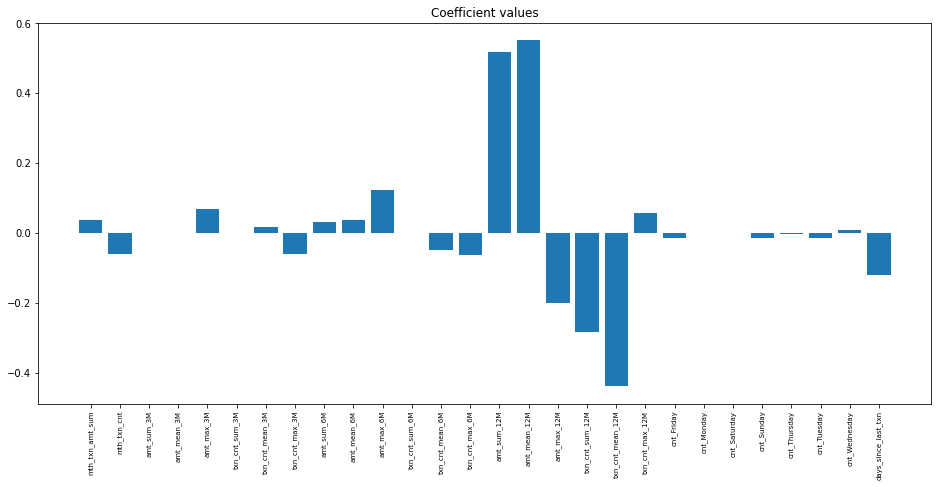

In [55]:
#5. Plot coeffcient values or feature importance.
LogReg=LogisticRegression(penalty='l1',solver='liblinear', C=0.05, class_weight='balanced',random_state=1147)
LogReg.fit(X_train_monthly_scaled, y_train_monthly)
coefficients=LogReg.coef_

#prediction and predicted probability 
y_test_pred = LogReg.predict(X_test_monthly_scaled) 
y_test_prob = LogReg.predict_proba(X_test_monthly_scaled) 
   
#scores for ROC curves 
scores_train = LogReg.predict_proba(X_train_monthly_scaled)[:, 1]
scores_test = LogReg.predict_proba(X_test_monthly_scaled)[:, 1] 

plot_coef(coefficients,X_train_monthly)

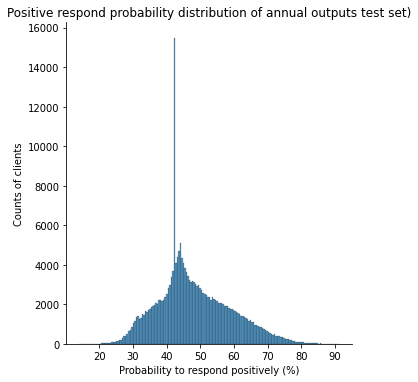

In [56]:
#6.Plot probability distribution for test set.
sns.displot(data = y_test_prob[:,1], x = 100 * y_test_prob[:,1])
plt.title('Positive respond probability distribution of annual outputs test set)')
plt.xlabel('Probability to respond positively (%)')
plt.ylabel('Counts of clients')
plt.show()

Precision: 0.13322759714512292
Recall 0.5296029947788395


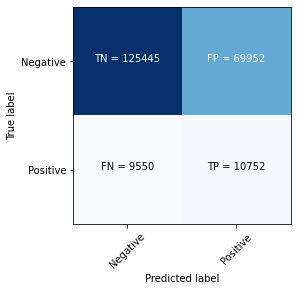

In [57]:
#7. Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall.
plot_confusion_matrix(y_test_monthly.values, y_test_pred)

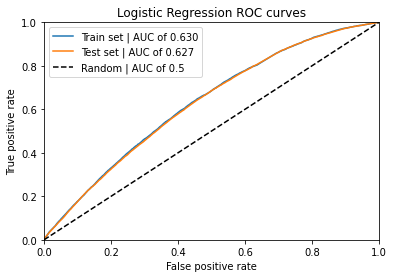

In [58]:
plot_ROC(y_train_monthly, scores_train, y_test_monthly, scores_test, 'Logistic Regression')

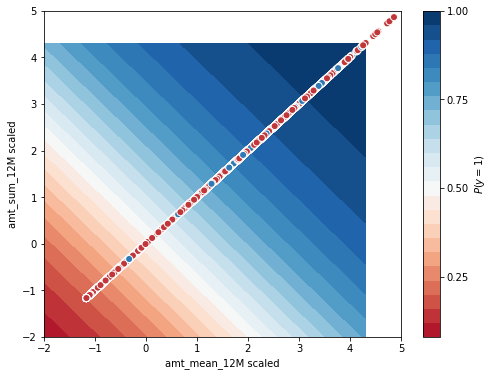

In [59]:
# 8. Plot decision boundary for top 2 features.
plot_decision_boundary(LogReg, 15, 14, X_train_monthly_scaled, X_train_monthly, y_train_monthly)

**Decision Tree**

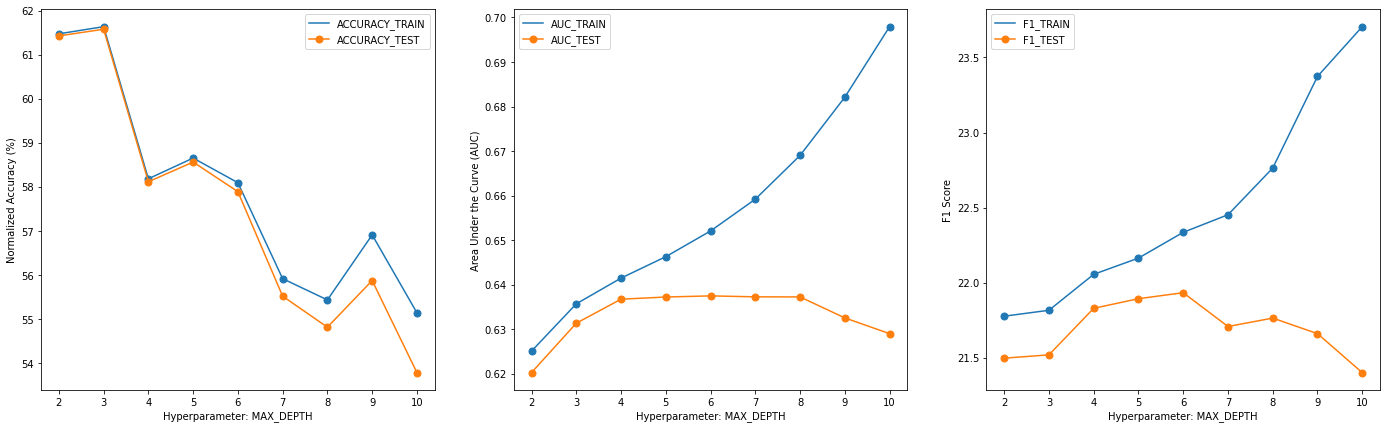

In [60]:
#4. Fit the training dataset and optimize the hyperparameters of the method
dt_performance_monthly=optimize_dt(X_train_monthly, y_train_monthly, X_test_monthly, y_test_monthly)
plot_performance(dt_performance_monthly,'MAX_DEPTH')

According to the performance metrics vs max_depth plots, the test set has better accuracy,AUC and F1 score when max_depth=4.

The indices for top 2 features are: 15:amt_mean_12M, 16:amt_max_12M 


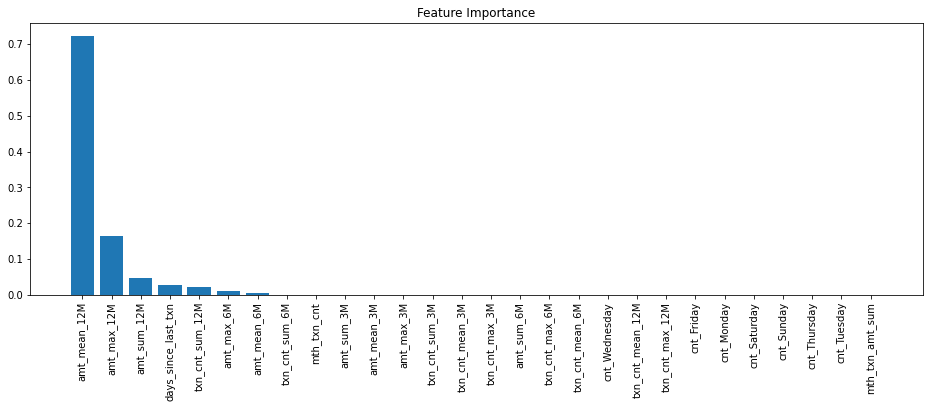

In [61]:
#5.Plot coefficient values or feature importance.
DecTree=DecisionTreeClassifier(max_depth=4, random_state=0, class_weight='balanced')
DecTree.fit(X_train_monthly, y_train_monthly)
feat_importance=DecTree.feature_importances_

#prediction and predicted probability 
y_test_pred = DecTree.predict(X_test_monthly) 
y_test_prob = DecTree.predict_proba(X_test_monthly) 
 
#scores for ROC curves 
scores_train = DecTree.predict_proba(X_train_monthly)[:, 1] 
scores_test = DecTree.predict_proba(X_test_monthly)[:, 1] 

plot_importance(feat_importance,X_train_monthly)

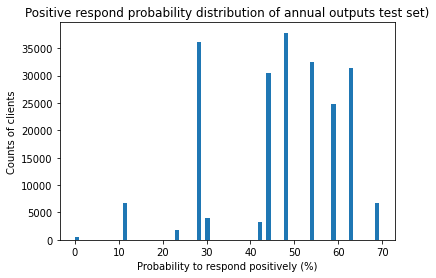

In [63]:
#6.Plot probability distribution for test set.
plt.hist(100*y_test_prob[:,1], bins=70)
plt.title('Positive respond probability distribution of annual outputs test set)')
plt.xlabel('Probability to respond positively (%)')
plt.ylabel('Counts of clients')
plt.show()

Precision: 0.13240619260036735
Recall 0.6213673529701508


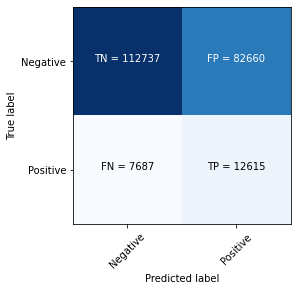

In [64]:
#7.Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall.
plot_confusion_matrix(y_test_monthly.values, y_test_pred)

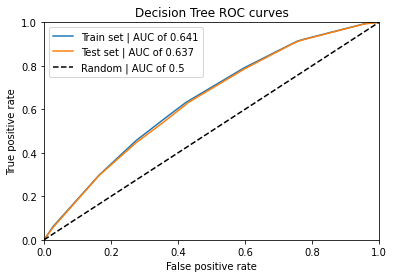

In [65]:
plot_ROC(y_train_monthly, scores_train, y_test_monthly, scores_test, 'Decision Tree')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


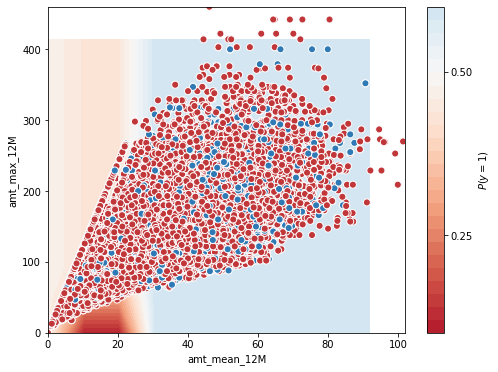

In [66]:
# 8. Plot decision boundary for top 2 features.
plot_decision_boundary_tree(DecTree,15, 16, X_train_monthly.values, X_train_monthly, y_train_monthly)

**Random Forests**

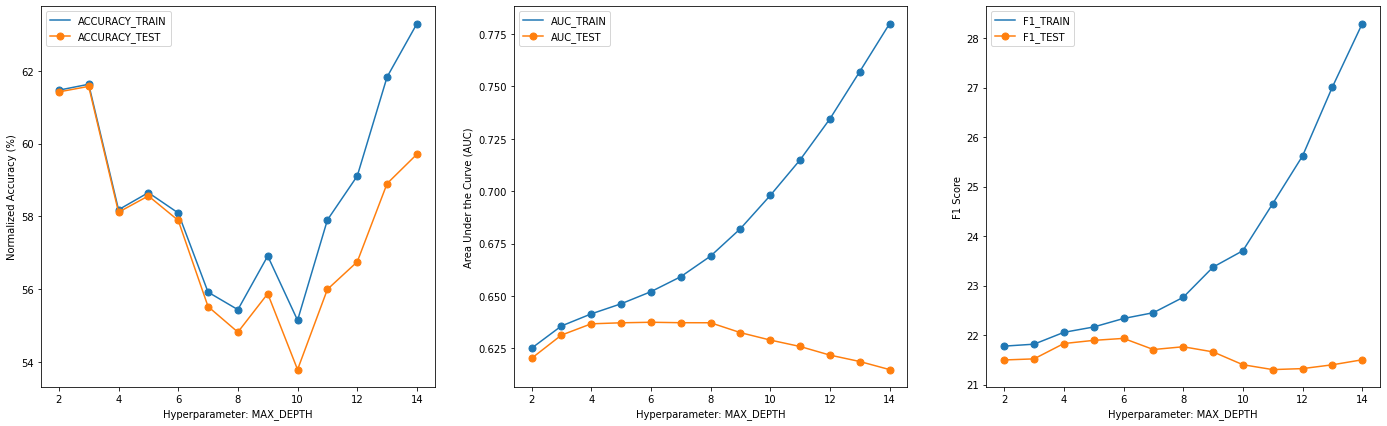

In [67]:
rf_performance_monthly=optimize_rf(X_train_monthly, y_train_monthly, X_test_monthly, y_test_monthly)
plot_performance(rf_performance_monthly,'MAX_DEPTH')

From the performance metrics versus max_depth plots,when the hyperparamter max_depth=14, the accuracy, AUC value and F1 score of the test set are the highest, so max_depth=14 is chosen for the best random forests model.

The indices for top 2 features are: 14:amt_sum_12M, 15:amt_mean_12M 


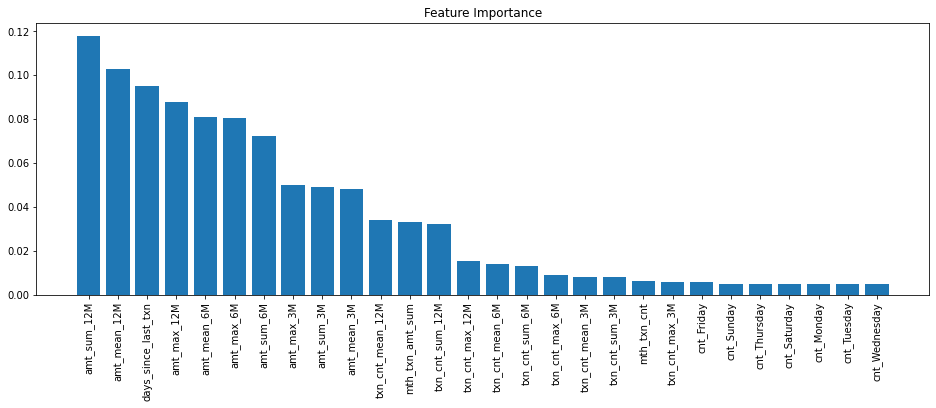

In [68]:
#5. Plot coeffcient values or feature importance.
RanFore=RandomForestClassifier(max_depth = 14, random_state=1147, class_weight='balanced')
RanFore.fit(X_train_monthly, y_train_monthly)
feat_importance=RanFore.feature_importances_

#prediction and predicted probability 
y_test_pred = RanFore.predict(X_test_monthly) 
y_test_prob = RanFore.predict_proba(X_test_monthly) 
 
#scores for ROC curves 
scores_train = RanFore.predict_proba(X_train_monthly)[:, 1] 
scores_test = RanFore.predict_proba(X_test_monthly)[:, 1] 

plot_importance(feat_importance,X_train_monthly)

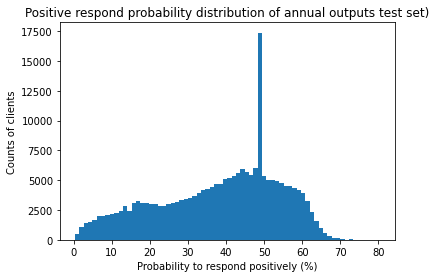

In [69]:
#6.Plot probability distribution for test set.
plt.hist(100*y_test_prob[:,1], bins=70)
plt.title('Positive respond probability distribution of annual outputs test set)')
plt.xlabel('Probability to respond positively (%)')
plt.ylabel('Counts of clients')
plt.show()

Precision: 0.15216944657165804
Recall 0.4012905132499261


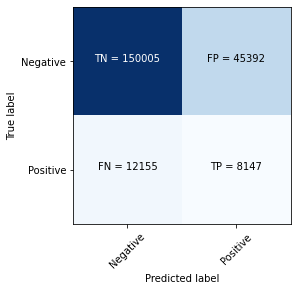

In [70]:
#7.Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall.
plot_confusion_matrix(y_test_monthly.values, y_test_pred)

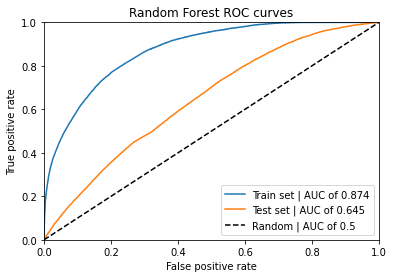

In [71]:
plot_ROC(y_train_monthly, scores_train, y_test_monthly, scores_test, 'Random Forest')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


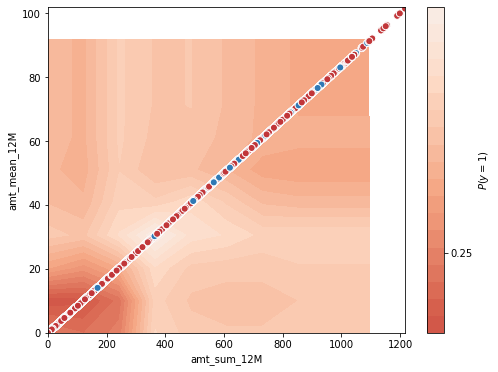

In [72]:
#8. Plot decision boundary for top 2 features.
plot_decision_boundary_tree(RanFore,14, 15, X_train_monthly.values, X_train_monthly, y_train_monthly)

# **1.3 Comparison of methods**

Compare the two feature engineering (annual and monthly) and the three modeling ap-proaches (L1 log-reg, tree, forests) in terms of the outcomes of steps 5-8. Which combina-tion of feature engineering and modeling approach do you select as the best to deploy in aproduction environment and why? Tabularize your findings in steps 5-8 to summarize the results and support your decision 


Comparison Table

|Feature Engineering|Model|precision|recall|Test Accuracy|Test set Probability distribution|Training AUC|Testing AUC|
| ---------------- | ----------- |----------- |----------- |----------- |----------- |----------- |----------- |
|Annual|L1 logistic regression|0.202|0.685|0.705|The majority of clients has probability to respond positively between 10% - 50%|0.808|0.765|
||Decision Tree|0.198|0.659|0.702|Some clients below 45%, others above 65%|0.784|0.742|
||Random Forests|0.193|0.707|0.704|Most clients distributed evenly below 70%|0.828|0.748|
|Monthly|L1 logistic regression|0.133|0.529|0.631|Most clients has probability to respond positively between 40% - 50%|0.630|0.627|
||Decision Tree|0.132|0.621|0.581|Most client has probability to respond positively between 25% - 65%|0.641|0.637|
||Random Forests|0.152|0.401|0.597|Most client has probability to respond positively between 10% - 60%,and a lot of clients are around 50%|0.874|0.645|

**Comparison of feature engineerings:**

As can be viewed form the compariosn table, annual features generally have higher performance metrics compared to those of monthly features. The reason could be that the monthly features output has much more data (number of rows) and much less features (number of columns) than the annual features output, which makes the models of the monthly features not able to capture all the information and more easily to be biased, for example the random forests model tends to be overfitted (much better performance in the training set than test set)

**Comparison of three different models:**

In terms of test set probability distribution, logistic regression and decision tree model are centered with a range of 10% - 50% and <45% or >65% respectively, while the probability distribution of random forests model are more evenly distributed below 70%.


When comparing AUC of different models, annual features output with logistic regression model has highest testing AUC with decent training AUC value.


Random forests model tends to make use of more variables than the other two models by making deeper tree structure and aggregating several simple trees, while logistic regression and decision tree are more focued on few features, which may not be able to capture all the information.

**Conclusion of best combination:**

In conclusion, the best combination is annual features output with logistic regression model. Annual features output generally has better performance than monthly output, and logistic regression model has the highes testing AUC and recall in all the three models, showing that it gives the best prediction given some input data of clients, which makes it easier and more precise to make the decision as to certain deals of some clients.